<a href="https://colab.research.google.com/github/Jeesoo-Jhun/mood-detection-music-recommendation/blob/main/modeling3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Preprocessing**

In this section, we will be using both data generators and data augmentation to train a deep learning model for human emotion detection using the FER-2013 dataset. Due to the size and complexity of the dataset, it would be impractical to load all of the images into memory at once. Therefore, we will be using data generators to generate batches of images on-the-fly during training, which will allow us to efficiently train our model on the entire dataset.

In addition, we will be applying various data augmentation techniques to the training images, such as rotation, shifting, and flipping. This will help to increase the size and diversity of our training set, which can improve the performance of our deep learning model. By introducing variability into the training process, data augmentation can also help to prevent overfitting, which occurs when the model becomes too closely tailored to the training set and performs poorly on new, unseen data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
img_shape = 48
batch_size = 64
train_data_path = '/content/drive/MyDrive/Data/Mood Detection/fer2013/versions/1/train'
test_data_path = '/content/drive/MyDrive/Data/Mood Detection/fer2013/versions/1/test'

In [10]:
train_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
        # Data Augmentation
        rotation_range=10,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest',
    )


test_preprocessor = ImageDataGenerator(
    rescale = 1 / 255.,
)

train_data = train_preprocessor.flow_from_directory(
    train_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    subset='training',
)


test_data = test_preprocessor.flow_from_directory(
    test_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size,
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## **Modeling**

### CNN Model

To develop the CNN architecture, we will begin by defining the input layer and the number of filters in the first convolutional layer. Then, we will add additional convolutional layers with increasing numbers of filters, followed by max-pooling layers to reduce the spatial dimensions of the feature maps. After the convolutional layers, we will add fully connected layers with ReLU activation to classify the emotions.

We will experiment with different numbers of convolutional layers, filter sizes, and fully connected layers to optimize the model performance. Additionally, we will use techniques such as dropout and batch normalization to prevent overfitting and improve the generalization capability of the model.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

def Create_CNN_Model():
    model = Sequential()

    # CNN1
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_shape, img_shape, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))

    # CNN2
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))

    # CNN3
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))

    # Output
    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(7, activation='softmax'))

    return model


In [12]:
CNN_Model = Create_CNN_Model()

CNN_Model.summary()

CNN_Model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 46, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 21, 21, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 21, 21, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 9, 9, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 9, 9, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 9, 9, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 9, 9, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,837,895 (29.90 MB)

 Trainable params: 7,832,519 (29.88 MB)

 Non-trainable params: 5,376 (21.00 KB)

**Specifying Callbacks**

In [14]:
# Install and import TensorFlow
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Create Callback Checkpoint
checkpoint_path = "CNN_Model_Checkpoint.keras"

Checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor="val_accuracy",
    save_best_only=True
)

# Create Early Stopping Callback to monitor the accuracy
Early_Stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

# Create ReduceLROnPlateau Callback to reduce overfitting by decreasing learning rate
Reducing_LR = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1
)

# Combine callbacks
callbacks = [Early_Stopping, Reducing_LR, Checkpoint]

# Calculate steps per epoch
steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size


In [ ]:
CNN_history = CNN_Model.fit( train_data , validation_data= test_data , epochs=50, batch_size= batch_size,
                            callbacks=callbacks, steps_per_epoch= steps_per_epoch, validation_steps=validation_steps)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 6443s 14s/step - accuracy: 0.1814 - loss: 2.2278 - val_accuracy: 0.2529 - val_loss: 1.8269 - learning_rate: 0.0010
Epoch 2/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 311us/step - accuracy: 0.4375 - loss: 1.6486 - val_accuracy: 0.0000e+00 - val_loss: 2.7447 - learning_rate: 0.0010
Epoch 3/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 1059s 2s/step - accuracy: 0.2628 - loss: 1.8158 - val_accuracy: 0.3327 - val_loss: 1.6542 - learning_rate: 0.0010
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2969 - loss: 1.8078 - val_accuracy: 1.0000 - val_loss: 0.6858 - learning_rate: 0.0010
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1075s 2s/step - accuracy: 0.3271 - loss: 1.6837 - val_accuracy: 0.4076 - val_loss: 1.5198 - learning_rate: 0.0010
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 221us/step - accuracy: 0.3594 - loss: 1.7898 - val_accuracy: 1.0000 - val_loss: 0.3643 - learning_rate: 0.0010
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1089s 2s/step - accuracy: 0.3910 - loss: 1.5674 - val_accuracy: 0.4494 - val_loss: 1.4152 - learning_rate: 0.0010
Epoch 8/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 12:47 2s/step - accuracy: 0.4844 - loss: 1.4231
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 208us/step - accuracy: 0.4844 - loss: 1.4231 -

At the 19th, early stopping applied.

In [18]:
import pandas as pd
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model


# Paths for saving checkpoints and training history
checkpoint_path = "/content/drive/MyDrive/Data/Mood Detection/CNN_model_checkpoint.weights.h5"
history_path = "/content/drive/MyDrive/Data/Mood Detection/CNN_training_history.csv"


# Training settings
epochs_per_run = 10  # Number of epochs per training run
total_epochs = 50    # Total epochs to train
initial_epoch = 0    # Starting epoch

# Callbacks for saving checkpoints and early stopping
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,  # Save only model weights
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

callbacks = [checkpoint, early_stopping]

# Load existing training history
if os.path.exists(history_path):
    history_df = pd.read_csv(history_path)
    initial_epoch = len(history_df)  # Resume from the last epoch
    print(f"Previous training history found. Resuming from epoch {initial_epoch}")
else:
    history_df = pd.DataFrame()
    print("No previous training history found. Starting from scratch.")

# Load model weights if a checkpoint exists
try:
    CNN_Model.load_weights(checkpoint_path)
    print("Checkpoint loaded successfully.")
except Exception as e:
    print("No checkpoint found. Starting from scratch.")

# Training loop (resume from the last saved epoch)
for start_epoch in range(initial_epoch, total_epochs, epochs_per_run):
    print(f"Starting epochs {start_epoch} to {start_epoch + epochs_per_run - 1}")

    CNN_history = CNN_Model.fit(
        train_data,
        validation_data=test_data,
        epochs=start_epoch + epochs_per_run,  # End epoch
        initial_epoch=start_epoch,            # Start epoch
        batch_size=batch_size,
        callbacks=callbacks,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps
    )

    # Save updated training history
    new_history_df = pd.DataFrame(CNN_history.history)
    history_df = pd.concat([history_df, new_history_df], ignore_index=True)
    history_df.to_csv(history_path, index=False)
    print(f"Training history updated and saved at {history_path}")

    # Confirm checkpoint save
    print(f"Model checkpoint saved at epoch {start_epoch + epochs_per_run}")

print("Training complete!")


No previous training history found. Starting from scratch.
No checkpoint found. Starting from scratch.
Starting epochs 0 to 9
Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.2114 - loss: 2.0356

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: saving model to /content/drive/MyDrive/Data/Mood Detection/CNN_model_checkpoint.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 8479s 19s/step - accuracy: 0.2114 - loss: 2.0354 - val_accuracy: 0.2287 - val_loss: 1.7846
Epoch 2/10
  1/448 ━━━━━━━━━━━━━━━━━━━━ 14:18 2s/step - accuracy: 0.2969 - loss: 1.7834
Epoch 2: saving model to /content/drive/MyDrive/Data/Mood Detection/CNN_model_checkpoint.weights.h5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2969 - loss: 1.7834 - val_accuracy: 0.2000 - val_loss: 2.1769
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2733 - loss: 1.7846
Epoch 3: saving model to /content/drive/MyDrive/Data/Mood Detection/CNN_model_checkpoint.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1104s 2s/step - accuracy: 0.2733 - loss: 1.7846 - val_accuracy: 0.3373 - val_loss: 1.6408
Epoch 4/10
  1/448 ━━━━━━━━━━━━━━━━━━━━ 14:29 2s/step - accuracy: 0.3438 - loss: 1.6774
Epoch 4: saving model to /content/drive/MyDrive/Data/Mood Detection/CNN_model_checkpoint.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3438 - loss: 1.6774 - val_accuracy: 0.9000 - val_loss: 0.6467
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3156 - loss: 1.7018
Epoch 5: saving model to /content/drive/MyDrive/Data/Mood Detection/CNN_model_checkpoint.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1096s 2s/step - accuracy: 0.3156 - loss: 1.7017 - val_accura

## **Evaluating CNN Model**

In [20]:
CNN_Score = CNN_Model.evaluate(test_data)

print("    Test Loss: {:.5f}".format(CNN_Score[0]))
print("Test Accuracy: {:.2f}%".format(CNN_Score[1] * 100))

113/113 ━━━━━━━━━━━━━━━━━━━━ 92s 808ms/step - accuracy: 0.4628 - loss: 1.3594
    Test Loss: 1.16103
Test Accuracy: 56.09%
113/113 ━━━━━━━━━━━━━━━━━━━━ 78s 685ms/step - accuracy: 0.4628 - loss: 1.3594
    Test Loss: 1.16103
Test Accuracy: 56.09%


In [21]:
def plot_curves(history):

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.figure(figsize=(15,5))

    #plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label = "training_loss")
    plt.plot(epochs, val_loss, label = "val_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()

    #plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label = "training_accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()

  #plt.tight_layout()

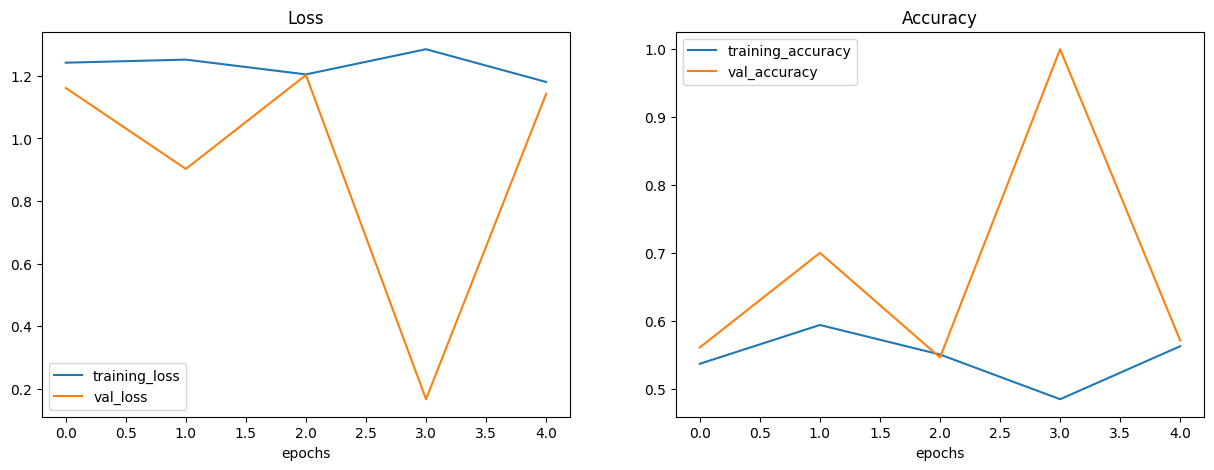

In [22]:
import matplotlib.pyplot as plt # Import the pyplot module and assign it the alias 'plt'

plot_curves(CNN_history) # Call the function to plot the curves

The training loss remains relatively stable, but the validation loss fluctuates significantly, indicating potential overfitting or instability in the validation process. Similarly, the validation accuracy shows a sharp peak at epoch 3 but drops quickly afterward, suggesting the model struggles to generalize to the validation data.

In [23]:
import numpy as np
CNN_Predictions = CNN_Model.predict(test_data)

# Choosing highest probalbilty class in every prediction
CNN_Predictions = np.argmax(CNN_Predictions, axis=1)

113/113 ━━━━━━━━━━━━━━━━━━━━ 79s 697ms/step


In [24]:
test_data.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

Text(0.5, 1.0, 'CNN Confusion Matrix')

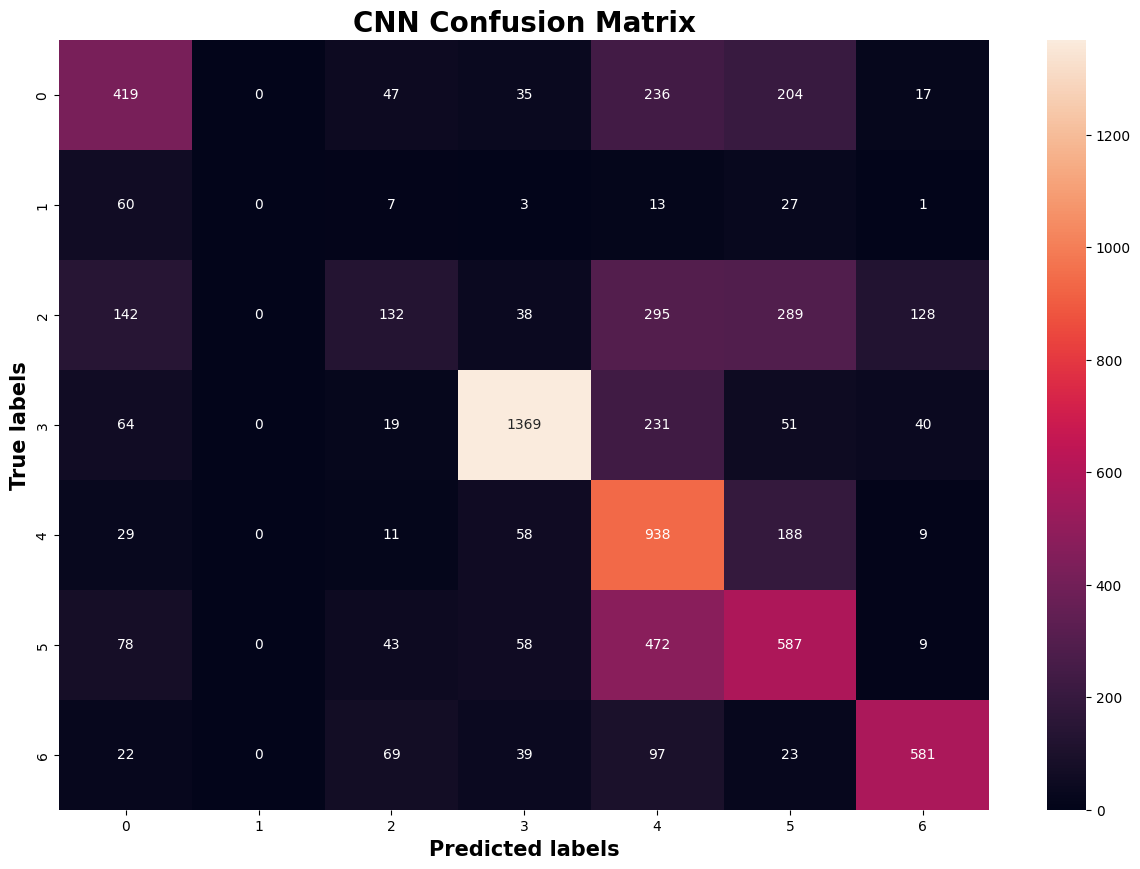

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, ax= plt.subplots(figsize=(15,10))

cm=confusion_matrix(test_data.labels, CNN_Predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('CNN Confusion Matrix', fontsize=20, fontweight='bold')

The confusion matrix shows that the model performs well for class 3 and class 4, as they have the highest correct predictions (1369 and 938, respectively). However, the model struggles with class 2 and class 5, as there are significant misclassifications across multiple other classes, indicating challenges in distinguishing certain categories.

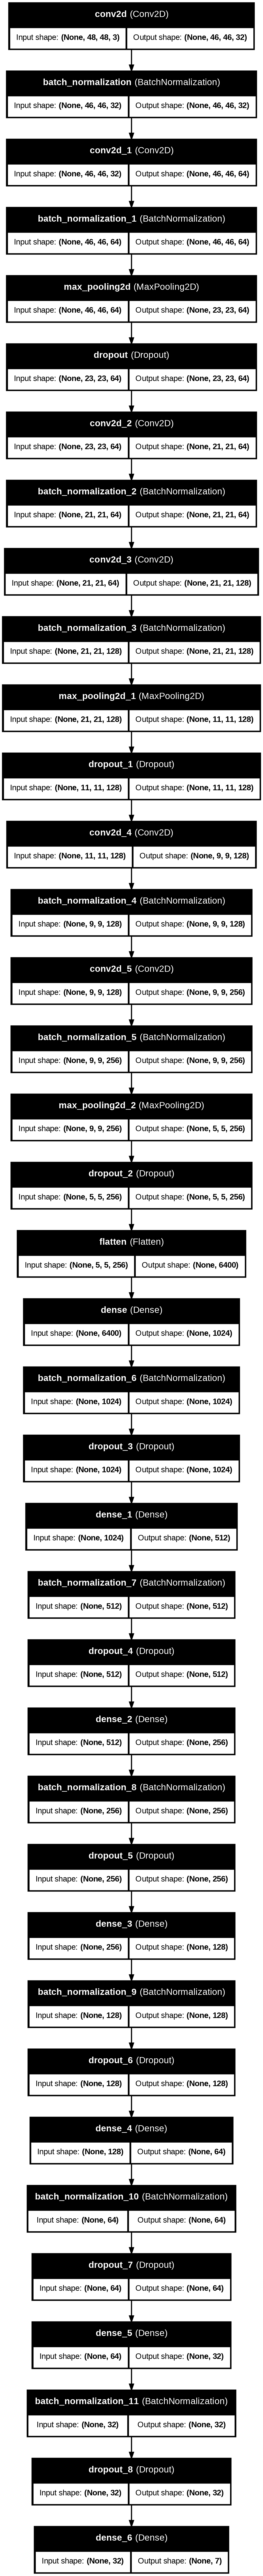

In [26]:
from tensorflow.keras.utils import plot_model # Import the plot_model function

plot_model(CNN_Model, to_file='model.png', show_shapes=True, show_layer_names=True)  # Use CNN_Model instead of 'model'

## **Fine Tuning CNN**

In [ ]:
epochs = 100
batch_size = 64

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=15,            # Increase patience to 15 epochs
    restore_best_weights=True,
    min_delta=0.01         # Consider improvement only if it's greater than 0.01
)

# Replace 'model' with 'CNN_Model' and use correct data generator names in the fit method
history = CNN_Model.fit(
    x=train_data, # Changed from train_generator to train_data
    epochs=epochs,
    validation_data=test_data, # Changed from validation_generator to test_data
    callbacks=[early_stopping]
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 6513s 14s/step - accuracy: 0.1841 - loss: 2.2417 - val_accuracy: 0.2545 - val_loss: 1.8330
Epoch 2/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1079s 2s/step - accuracy: 0.2698 - loss: 1.7941 - val_accuracy: 0.3778 - val_loss: 1.6043
Epoch 3/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1055s 2s/step - accuracy: 0.3413 - loss: 1.6576 - val_accuracy: 0.4081 - val_loss: 1.5216
Epoch 4/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1037s 2s/step - accuracy: 0.4112 - loss: 1.5216 - val_accuracy: 0.4812 - val_loss: 1.3483
Epoch 5/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1039s 2s/step - accuracy: 0.4551 - loss: 1.4314 - val_accuracy: 0.4979 - val_loss: 1.3239
Epoch 6/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1040s 2s/step - accuracy: 0.4809 - loss: 1.3661 - val_accuracy: 0.5124 - val_loss: 1.2720
Epoch 7/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1035s 2s/step - accuracy: 0.5039 - loss: 1.3190 - val_accuracy: 0.5167 - val_loss: 1.2970
Epoch 8/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1033s 2s/step - accuracy: 0.5142 - loss: 1.2878 - val

It stopped in the 51th. since it keeps stopping in the middle of deep learning, I tried several safety measures.

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import pandas as pd

# Training settings
checkpoint_path = "model_checkpoint.weights.h5"  # Updated extension
epochs_per_run = 10
total_epochs = 100

# Callback settings
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,  # Save weights only
    save_best_only=False,    # Save after every epoch
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',     # Monitor validation accuracy
    patience=15,                # Stop training if no improvement for 15 epochs
    restore_best_weights=True,  # Restore the best model weights
    min_delta=0.01              # Minimum change to qualify as an improvement
)

# Load model (resume training if a checkpoint is found)
try:
    CNN_Model.load_weights(checkpoint_path)
    print("Checkpoint loaded successfully.")
except Exception as e:
    print("No checkpoint found, starting from scratch.")

# Training loop (split training into multiple runs)
for start_epoch in range(0, total_epochs, epochs_per_run):
    print(f"Starting epochs {start_epoch} to {start_epoch + epochs_per_run - 1}")
    history = CNN_Model.fit(
        x=train_data,  # Use the existing train_data
        epochs=start_epoch + epochs_per_run,   # End epoch for this run
        validation_data=test_data,            # Use the existing test_data
        initial_epoch=start_epoch,            # Start epoch for this run
        callbacks=[checkpoint, early_stopping]
    )

    # Save training history
    history_df = pd.DataFrame(history.history)
    history_df.to_csv(f"training_history_{start_epoch}.csv", index=False)

# Save checkpoints to Google Drive
checkpoint_path = "/content/drive/MyDrive/Data/Mood Detection/model_checkpoint.weights.h5"

No checkpoint found, starting from scratch.
Starting epochs 0 to 9
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.1838 - loss: 2.2017 
Epoch 1: saving model to model_checkpoint.weights.h5
449/449 ━━━━━━━━━━━━━━━━━━━━ 11423s 25s/step - accuracy: 0.1839 - loss: 2.2013 - val_accuracy: 0.2388 - val_loss: 1.8375
Epoch 2/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2789 - loss: 1.7834
Epoch 2: saving model to model_checkpoint.weights.h5
449/449 ━━━━━━━━━━━━━━━━━━━━ 1291s 3s/step - accuracy: 0.2789 - loss: 1.7834 - val_accuracy: 0.3745 - val_loss: 1.6139
Epoch 3/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3468 - loss: 1.6350
Epoch 3: saving model to model_checkpoint.weights.h5
449/449 ━━━━━━━━━━━━━━━━━━━━ 1288s 3s/step - accuracy: 0.3468 - loss: 1.6349 - val_accuracy: 0.4225 - val_loss: 1.4782
Epoch 4/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4114 - loss: 1.5146
Epoch 4: saving model to model_checkpoint.weights.h5
449/449 ━━━━━━━━━━━━━━━━━━━━ 1257s 3s/step - accuracy: 0.4114 - loss: 1.5145 - val_accuracy: 0.476

It stopped at 56th.

In [27]:
checkpoint_path = "/content/drive/MyDrive/Data/Mood Detection/model_checkpoint.weights.h5"

try:
    CNN_Model.load_weights(checkpoint_path)
    print("Checkpoint loaded successfully. Resuming training...")
except Exception as e:
    print("No checkpoint found. Starting from scratch.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Checkpoint loaded successfully. Resuming training...


In [28]:
!find /content/drive/My\ Drive/ -name "*.weights.h5"


/content/drive/My Drive/Data/Mood Detection/model_checkpoint.weights.h5
/content/drive/My Drive/Data/Mood Detection/CNN_model_checkpoint.weights.h5
/content/drive/My Drive/model_checkpoint.weights.h5


In [13]:
# Training configuration
epochs_per_run = 10  # Number of epochs to train per run
total_epochs = 100   # Total number of epochs

# Resume training from the stopped epoch
for start_epoch in range(55, total_epochs, epochs_per_run):  # Adjust the starting epoch
    print(f"Resuming epochs {start_epoch} to {start_epoch + epochs_per_run - 1}")
    history = CNN_Model.fit(
        x=train_data,
        validation_data=test_data,
        epochs=start_epoch + epochs_per_run,   # Set the ending epoch
        initial_epoch=start_epoch,            # Set the starting epoch
        callbacks=[checkpoint]
    )

    # Save the checkpoint (in case training is interrupted again)
    CNN_Model.save_weights(checkpoint_path)
    print(f"Model checkpoint saved at epoch {start_epoch + epochs_per_run}")


Resuming epochs 55 to 64


NameError: name 'checkpoint' is not defined

## **Evaluating fine-tuned CNN Model**

In [1]:
# Plot the train and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

ValueError: x and y must have same first dimension, but have shapes (1,) and (16,)

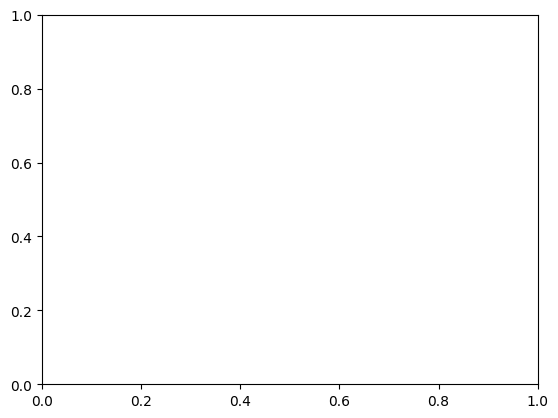

In [ ]:
# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)  # Redefine epochs to match the length of train_acc/val_acc
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## **ResNet50V2 Model**

Why choosing ResNet50V2 Model?

ResNet50V2 is chosen due to its demonstrated effectiveness in image classification tasks.
Its residual learning architecture helps mitigate the vanishing gradient problem, enabling training of deeper networks and potentially capturing more complex features from the facial images, which is beneficial for emotion recognition.  
Furthermore, pre-trained weights can be used as a starting point, allowing faster convergence and better performance with the available data.  Its relatively high accuracy on other image datasets suggests a strong foundation for this application.  While a custom CNN was explored as a baseline, the architectural advantages of ResNet50V2 make it a preferred choice for this task.

In [29]:
# specifing new image shape for resnet
img_shape = 224
batch_size = 64

In [30]:
train_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
        rotation_range=10,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest',
    )


test_preprocessor = ImageDataGenerator(
    rescale = 1 / 255.,
)

train_data = train_preprocessor.flow_from_directory(
    train_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    subset='training',
)

test_data = test_preprocessor.flow_from_directory(
    test_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size,
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## **Fine-Tuning ResNet50V2**

In [31]:
# 224,224,3
ResNet50V2 = tf.keras.applications.ResNet50V2(input_shape=(224, 224, 3),
                                               include_top= False,
                                               weights='imagenet'
                                               )

ResNet50V2.summary()

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 56, 56, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 56, 56, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 58, 58, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 23,519,360 (89.72 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [32]:
# Freezing all layers except last 50

ResNet50V2.trainable = True

for layer in ResNet50V2.layers[:-50]:
    layer.trainable = False

In [33]:
def Create_ResNet50V2_Model():

    model = Sequential([
                      ResNet50V2,
                      Dropout(.25),
                      BatchNormalization(),
                      Flatten(),
                      Dense(64, activation='relu'),
                      BatchNormalization(),
                      Dropout(.5),
                      Dense(7,activation='softmax')
                    ])
    return model

In [34]:
ResNet50V2_Model = Create_ResNet50V2_Model()

ResNet50V2_Model.summary()

ResNet50V2_Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)              │ (None, 7, 7, 2048)          │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 7, 7, 2048)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 7, 7, 2048)          │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │       6,422,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,996,295 (114.43 MB)

 Trainable params: 22,779,527 (86.90 MB)

 Non-trainable params: 7,216,768 (27.53 MB)

**Specifying Callbacks**

In [36]:
# Create Callback Checkpoint
checkpoint_path = "ResNet50V2_Model_Checkpoint.keras"  # Add the .keras extension

Checkpoint = ModelCheckpoint(checkpoint_path, monitor="val_accuracy", save_best_only=True)

# Create Early Stopping Callback to monitor the accuracy
Early_Stopping = EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True, verbose=1)

# Create ReduceLROnPlateau Callback to reduce overfitting by decreasing learning rate
Reducing_LR = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1
)

callbacks = [Checkpoint, Early_Stopping, Reducing_LR]

# Calculate steps per epoch
steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size


In [ ]:
ResNet50V2_history = ResNet50V2_Model.fit(train_data ,validation_data = test_data , epochs=30, batch_size=batch_size,
                                         callbacks = callbacks, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  5/448 ━━━━━━━━━━━━━━━━━━━━ 2:28:54 20s/step - accuracy: 0.1565 - loss: 2.8514